<a href="https://colab.research.google.com/github/shivampip/NotDog/blob/master/shiv_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dog or Not Dog [shiv]

In [1]:
! git clone https://www.github.com/shivampip/NotDog

fatal: destination path 'NotDog' already exists and is not an empty directory.


In [2]:
cd NotDog

/content/NotDog


In [0]:
from imgdata import ImgData
import numpy as np

Total 4000 image files found


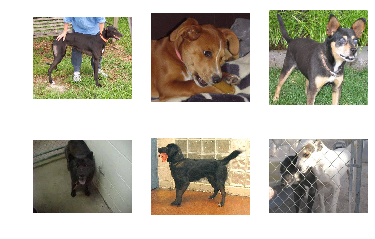

In [4]:
idog= ImgData("data/dog/")
idog.get_all_files()
idog.plot_raw_sample(rows= 2, cols= 3)

In [5]:
dog_data = idog.process(size=(150,150), count= 4000, silent= True)

Resizing DONE
Converting to NP DONE


In [0]:
#idog.plot_np_imgs(dog_data)

Total 2500 image files found


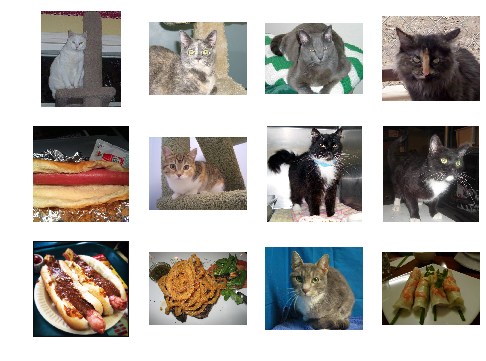

In [7]:
indog= ImgData("data/notdog/")
indog.get_all_files()
indog.plot_raw_sample(rows= 3, cols= 4)

In [8]:
ndog_data = indog.process(size=(150,150), count= 2500, silent= True)

Resizing DONE
Converting to NP DONE


In [0]:
#indog.plot_np_imgs(ndog_data)

### Combining

In [10]:
y_dog= np.zeros((dog_data.shape[0], 1))
y_ndog= np.ones((ndog_data.shape[0], 1))
print(y_dog.shape, y_ndog.shape)

(4000, 1) (2500, 1)


In [0]:
X, y= idog.shuffle([(dog_data, y_dog), (ndog_data, y_ndog)])

In [0]:
X/=255.0

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, shuffle= True)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4875, 150, 150, 3)
(4875, 1)
(1625, 150, 150, 3)
(1625, 1)


In [0]:
#idog.plot_np_imgs(X_train, count=10)
#print(y_train[:10])

## Model Building

In [0]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [0]:
img_input= layers.Input(shape=(150, 150, 3))

In [18]:
x= layers.Conv2D(16, 3, activation='relu')(img_input)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
x= layers.MaxPool2D(2)(x)

In [0]:
x= layers.Conv2D(32, 3, activation='relu')(x)

In [0]:
x= layers.MaxPool2D(2)(x)

In [0]:
x= layers.Conv2D(64, 3, activation='relu')(x)

In [0]:
x= layers.MaxPool2D(2)(x)

In [0]:
x= layers.Flatten()(x)

In [0]:
x= layers.Dense(512, activation='relu')(x)

In [0]:
output= layers.Dense(1, activation='sigmoid')(x)

In [0]:
model= Model(img_input, output)

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
__________

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [30]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 4875 samples, validate on 1625 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
4875/4875 [==============================] - 9s 2ms/sample - loss: 0.7073 - acc: 0.6164 - val_loss: 0.6707 - val_acc: 0.6554
Epoch 2/10
4875/4875 [==============================] - 7s 1ms/sample - loss: 0.5794 - acc: 0.6978 - val_loss: 0.5580 - val_acc: 0.7403
Epoch 3/10
4875/4875 [==============================] - 7s 1ms/sample - loss: 0.5052 - acc: 0.7458 - val_loss: 0.5769 - val_acc: 0.7342
Epoch 4/10
4875/4875 [==============================] - 7s 1ms/sample - loss: 0.4331 - acc: 0.7930 - val_loss: 0.7045 - val_acc: 0.6652
Epoch 5/10
4875/4875 [==============================] - 7s 1ms/sample - loss: 0.3734 - acc: 0.8230 - val_loss: 0.4979 - val_acc: 0.7575
Epoch 6/10
4875/4875 [==============================] - 7s 1ms/sample - loss: 0.2962 - acc: 0.8743 - val_loss: 0.6470 - val_acc: 0.7575
Epoch 7/10
4875/4875 [==============================] - 7s 1ms/sample - loss: 0.2265 - a

In [31]:
model.evaluate(X_test, y_test)

1625/1625 [==============================] - 1s 462us/sample - loss: 1.0114 - acc: 0.7415


[1.0114031017010028, 0.74153847]

## DONE